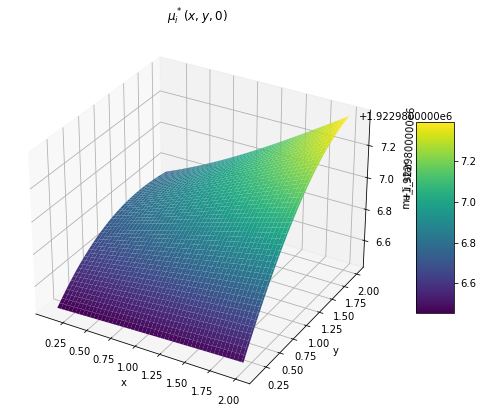

For t = 0, the maximum value of mu_i_star is 1922987.40 at x = 2.00 and y = 2.00

For t = 0, the minimum value of mu_i_star is 1922986.45 at x = 0.10 and y = 0.10



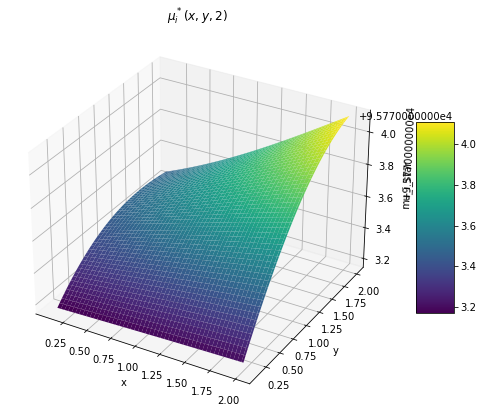

For t = 2, the maximum value of mu_i_star is 95774.11 at x = 2.00 and y = 2.00

For t = 2, the minimum value of mu_i_star is 95773.16 at x = 0.10 and y = 0.10



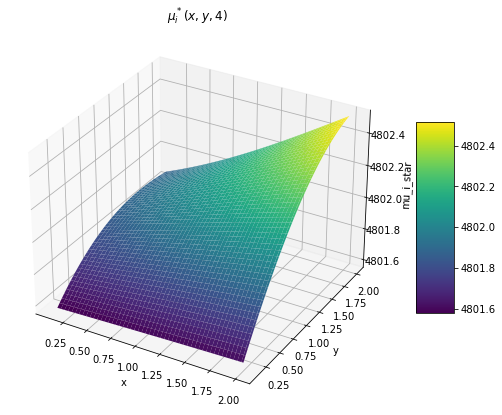

For t = 4, the maximum value of mu_i_star is 4802.52 at x = 2.00 and y = 2.00

For t = 4, the minimum value of mu_i_star is 4801.57 at x = 0.10 and y = 0.10



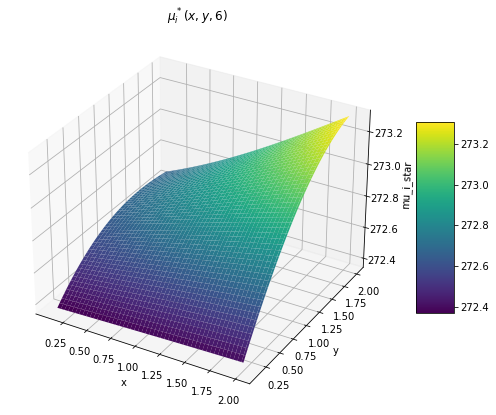

For t = 6, the maximum value of mu_i_star is 273.31 at x = 2.00 and y = 2.00

For t = 6, the minimum value of mu_i_star is 272.36 at x = 0.10 and y = 0.10



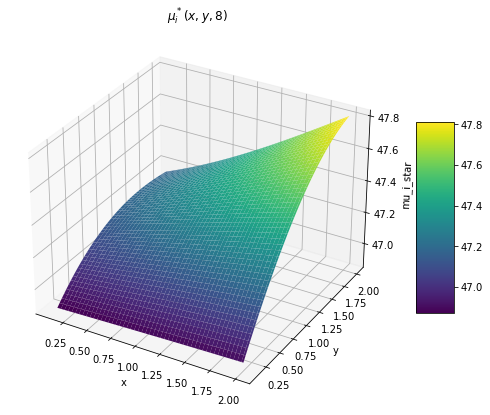

For t = 8, the maximum value of mu_i_star is 47.82 at x = 2.00 and y = 2.00

For t = 8, the minimum value of mu_i_star is 46.87 at x = 0.10 and y = 0.10



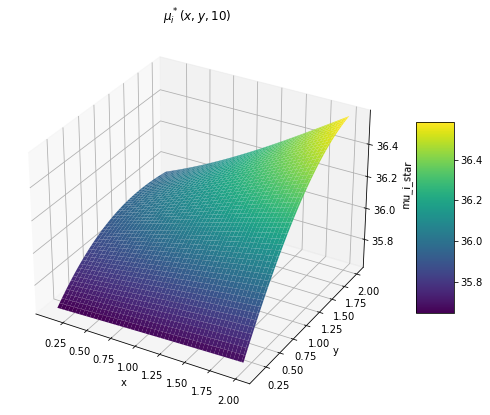

For t = 10, the maximum value of mu_i_star is 36.59 at x = 2.00 and y = 2.00

For t = 10, the minimum value of mu_i_star is 35.64 at x = 0.10 and y = 0.10



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Simulation parameters
T = 10  # Time horizon
alpha = -0.7
beta_i = 3
epsilon = -1.5
mu_0 = 0.4
upsilon_0 = 0.4
rho_0 = 0.2
mu_i = 1.7
upsilon_i = 1.2
rho_i = 0.5
mu_0_t = 100

# Define the integrand function for P(y)
def integrand(z):
    return np.exp(-1/8 * z**2)

# Define the function P(y)
def P(y):
    result, _ = quad(integrand, y, np.inf)
    return result

# Define the new integrand function for Q(x, y)
def new_integrand(z, x):
    return np.exp(-1/8 * (z - x)**2)

# Define the new upper limit function for integration
def new_upper_limit(y, x):
    result, _ = quad(lambda z: new_integrand(z, x), -np.inf, y)
    return result / np.sqrt(2 * np.pi)

# Define the function Q(x, y)
def Q(x, y):
    return new_upper_limit(y, x)

# Define functions s(x) and u(x)
def s(x):
    return 0.5 * x

# Function to calculate mu_i_star
def calculate_mu_i_star(x, y, t):
    Lambda_i = (np.exp(epsilon * (t - T)) - rho_i) / epsilon
    mu_i_star = (upsilon_i * mu_0_t - beta_i * Lambda_i) / (2 * mu_i) + Q(x, y) * s(x) 
    return mu_i_star

# Generate x, y values
x_values = np.linspace(0.1, 2, 100)
y_values = np.linspace(0.1, 2, 100)

# Define specific time points
t_points = [0, 2, 4, 6, 8, 10]

# Plot mu_i_star for each time point in separate plots
for t in t_points:
    # Create new figure
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('mu_i_star')
    ax.set_title(fr'$\mu_i^*(x, y, {t})$')

    # Calculate mu_i_star for all combinations of x, y at the current time point
    mu_i_star_values = np.zeros((len(x_values), len(y_values)))
    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):
            mu_i_star_values[i, j] = calculate_mu_i_star(x, y, t)

    # Plot surface
    X, Y = np.meshgrid(x_values, y_values)
    surf = ax.plot_surface(X, Y, mu_i_star_values, cmap='viridis')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    plt.show()
    
    # Find the maximum value and corresponding indices
    max_value = np.max(mu_i_star_values)
    max_indices = np.unravel_index(np.argmax(mu_i_star_values, axis=None), mu_i_star_values.shape)
    max_x = x_values[max_indices[0]]
    max_y = y_values[max_indices[1]]
    
    # Print the maximum value and corresponding x, y coordinates below the plot
    print(f'For t = {t}, the maximum value of mu_i_star is {max_value:.2f} at x = {max_x:.2f} and y = {max_y:.2f}\n')
# Find the minimum value and corresponding indices
    min_value = np.min(mu_i_star_values)
    min_indices = np.unravel_index(np.argmin(mu_i_star_values, axis=None), mu_i_star_values.shape)
    min_x = x_values[min_indices[0]]
    min_y = y_values[min_indices[1]]
    
    # Print the minimum value and corresponding x, y coordinates below the plot
    print(f'For t = {t}, the minimum value of mu_i_star is {min_value:.2f} at x = {min_x:.2f} and y = {min_y:.2f}\n')

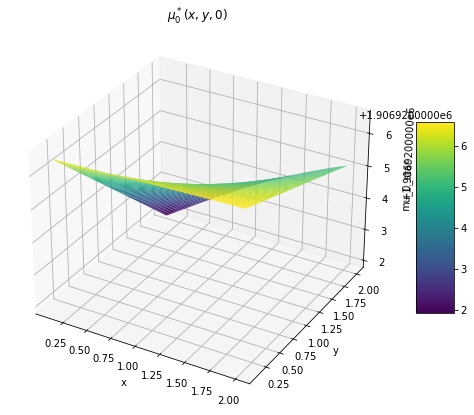

For t = 0, the maximum value of mu_0_star is 1906926.60 at x = 0.10 and y = 2.00
The minimum value of mu_0_star is 1906921.87 at x = 2.00 and y = 0.10



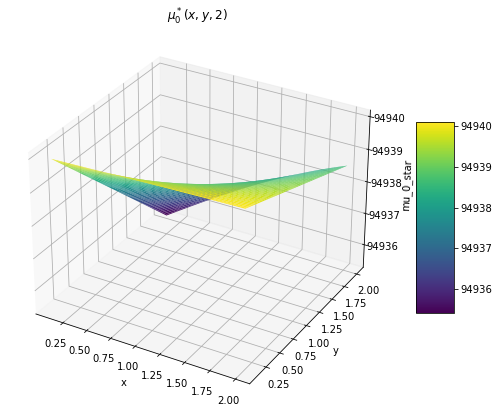

For t = 2, the maximum value of mu_0_star is 94940.10 at x = 0.10 and y = 2.00
The minimum value of mu_0_star is 94935.36 at x = 2.00 and y = 0.10



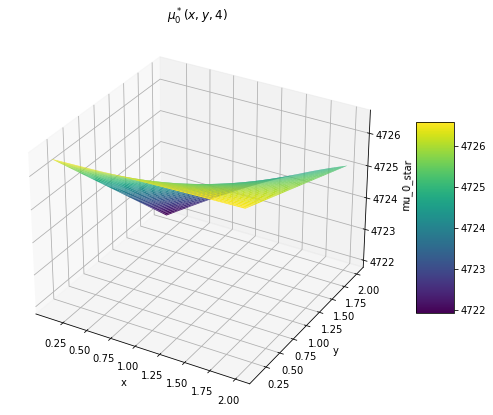

For t = 4, the maximum value of mu_0_star is 4726.60 at x = 0.10 and y = 2.00
The minimum value of mu_0_star is 4721.87 at x = 2.00 and y = 0.10



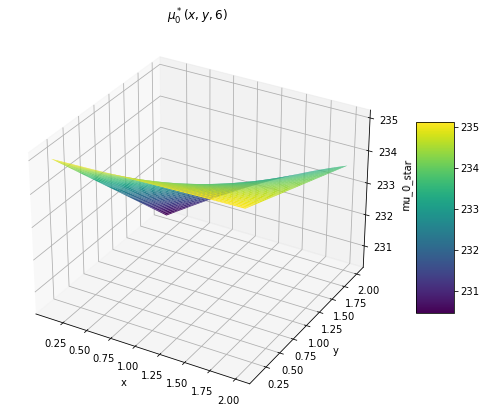

For t = 6, the maximum value of mu_0_star is 235.14 at x = 0.10 and y = 2.00
The minimum value of mu_0_star is 230.40 at x = 2.00 and y = 0.10



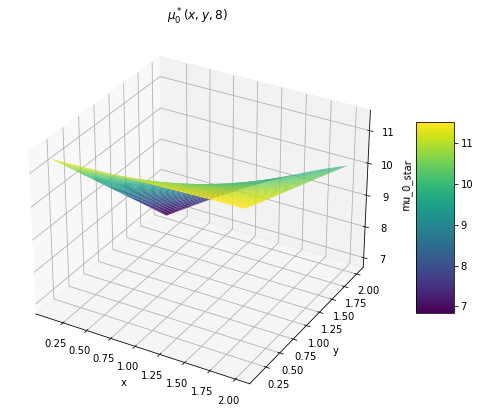

For t = 8, the maximum value of mu_0_star is 11.52 at x = 0.10 and y = 2.00
The minimum value of mu_0_star is 6.79 at x = 2.00 and y = 0.10



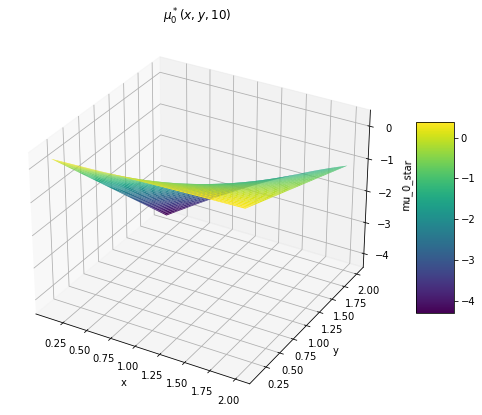

For t = 10, the maximum value of mu_0_star is 0.39 at x = 0.10 and y = 2.00
The minimum value of mu_0_star is -4.35 at x = 2.00 and y = 0.10



In [6]:
# Function to calculate mu_0_star
def calculate_mu_0_star(x, y, t):
    Lambda_0 = (rho_0 - np.exp(epsilon * (t - T))) / epsilon
    mu_0_star = - (alpha * Lambda_0) / (2 * upsilon_0) - P(y) * x
    return mu_0_star

# Generate x, y values
x_values = np.linspace(0.1, 2, 100)
y_values = np.linspace(0.1, 2, 100)

# Define specific time points
t_points = [0, 2, 4, 6, 8, 10]

# Plot mu_0_star for each time point in separate plots
for t in t_points:
    # Create new figure
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('mu_0_star')
    ax.set_title(fr'$\mu_0^*(x, y, {t})$')

    # Calculate mu_0_star for all combinations of x, y at the current time point
    mu_0_star_values = np.zeros((len(x_values), len(y_values)))
    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):
            mu_0_star_values[i, j] = calculate_mu_0_star(x, y, t)

    # Plot surface
    X, Y = np.meshgrid(x_values, y_values)
    surf = ax.plot_surface(X, Y, mu_0_star_values, cmap='viridis')
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
    
    # Find the maximum value and corresponding indices
    max_value = np.max(mu_0_star_values)
    max_indices = np.unravel_index(np.argmax(mu_0_star_values, axis=None), mu_0_star_values.shape)
    max_x = x_values[max_indices[0]]
    max_y = y_values[max_indices[1]]
    
    # Find the minimum value and corresponding indices
    min_value = np.min(mu_0_star_values)
    min_indices = np.unravel_index(np.argmin(mu_0_star_values, axis=None), mu_0_star_values.shape)
    min_x = x_values[min_indices[0]]
    min_y = y_values[min_indices[1]]
    
    # Print the maximum value and corresponding x, y coordinates below the plot
    print(f'For t = {t}, the maximum value of mu_0_star is {max_value:.2f} at x = {max_x:.2f} and y = {max_y:.2f}')
    # Print the minimum value and corresponding x, y coordinates below the plot
    print(f'The minimum value of mu_0_star is {min_value:.2f} at x = {min_x:.2f} and y = {min_y:.2f}\n')


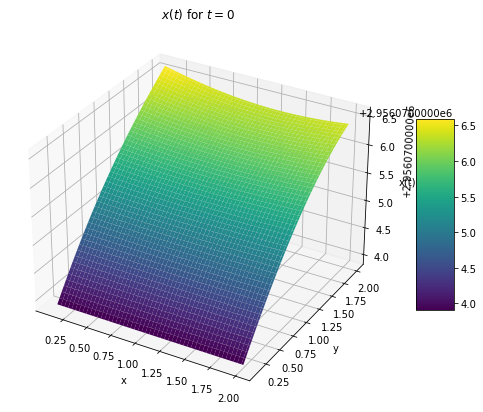

For t = 0, the maximum value of 'x(t)' is 2956076.60 at x = 2.00 and y = 0.10
The minimum value of 'x(t)' is 2956073.87 at x = 0.10 and y = 2.00



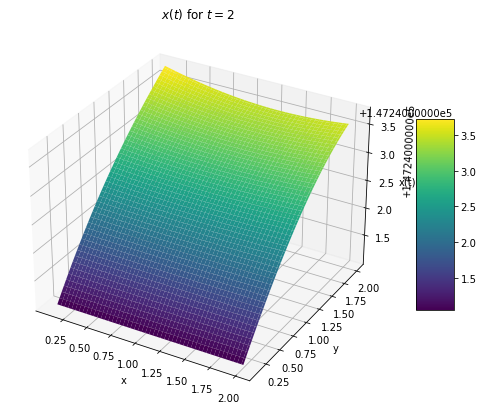

For t = 2, the maximum value of 'x(t)' is 147243.74 at x = 2.00 and y = 0.10
The minimum value of 'x(t)' is 147241.01 at x = 0.10 and y = 2.00



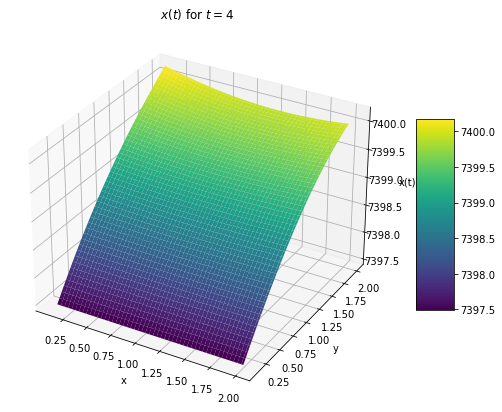

For t = 4, the maximum value of 'x(t)' is 7400.19 at x = 2.00 and y = 0.10
The minimum value of 'x(t)' is 7397.46 at x = 0.10 and y = 2.00



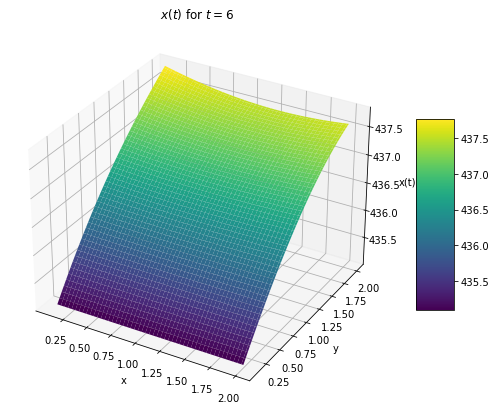

For t = 6, the maximum value of 'x(t)' is 437.78 at x = 2.00 and y = 0.10
The minimum value of 'x(t)' is 435.06 at x = 0.10 and y = 2.00



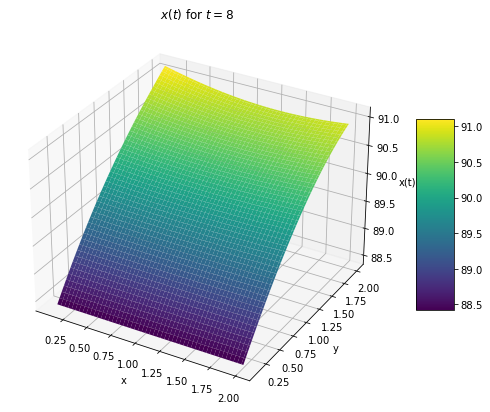

For t = 8, the maximum value of 'x(t)' is 91.11 at x = 2.00 and y = 0.10
The minimum value of 'x(t)' is 88.39 at x = 0.10 and y = 2.00



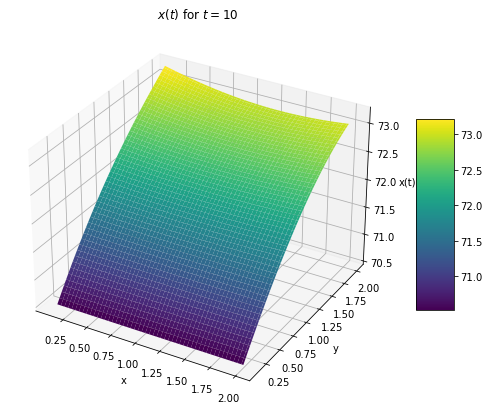

For t = 10, the maximum value of 'x(t)' is 73.22 at x = 2.00 and y = 0.10
The minimum value of 'x(t)' is 70.49 at x = 0.10 and y = 2.00



In [10]:
# Function to calculate risk level x(t) for a system with one attacker using new mu_star definitions
def calculate_risk_level_one_attacker_new():
    x_values_one_attacker = []
    for x in x_values:
        for y in y_values:
            x_t = []
            for t in t_points:
                mu_0_star = calculate_mu_0_star(x, y, t)
                mu_i_star = calculate_mu_i_star(x, y, t)
                x_t.append((1 / epsilon) * (np.exp(epsilon * (T - t)) - alpha * mu_0_star - beta_i * mu_i_star))
            x_values_one_attacker.append(x_t)
    return x_values_one_attacker
x_values_one_attacker_new = calculate_risk_level_one_attacker_new()

# Reshape the data for plotting
X, Y = np.meshgrid(x_values, y_values)
x_values_one_attacker_new_reshaped = np.array(x_values_one_attacker_new).reshape(len(x_values), len(y_values), len(t_points))


# Plot x(t) for each time point in separate plots
for t in t_points:
    # Create new figure
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('x(t)')
    ax.set_title(fr'$x(t)$ for $t={t}$')

    # Calculate x(t) for all combinations of x, y at the current time point
    x_t_values = np.zeros((len(x_values), len(y_values)))
    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):
            mu_0_star = calculate_mu_0_star(x, y, t)
            mu_i_star = calculate_mu_i_star(x, y, t)
            x_t_values[i, j] = (1 / epsilon) * (np.exp(epsilon * (T - t)) - alpha * mu_0_star - beta_i * mu_i_star)

    # Plot surface
    X, Y = np.meshgrid(x_values, y_values)
    surf = ax.plot_surface(X, Y, x_t_values, cmap='viridis')
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
 # Calculate and print max and min values and their corresponding coordinates
    max_value = np.max(x_t_values)
    max_indices = np.unravel_index(np.argmax(x_t_values), x_t_values.shape)
    max_x = x_values[max_indices[0]]
    max_y = y_values[max_indices[1]]
    
    min_value = np.min(x_t_values)
    min_indices = np.unravel_index(np.argmin(x_t_values), x_t_values.shape)
    min_x = x_values[min_indices[0]]
    min_y = y_values[min_indices[1]]
    
    # Print the maximum value and corresponding x, y coordinates below the plot
    print(f"For t = {t}, the maximum value of 'x(t)' is {max_value:.2f} at x = {max_x:.2f} and y = {max_y:.2f}")
    # Print the minimum value and corresponding x, y coordinates below the plot
    print(f"The minimum value of 'x(t)' is {min_value:.2f} at x = {min_x:.2f} and y = {min_y:.2f}\n")


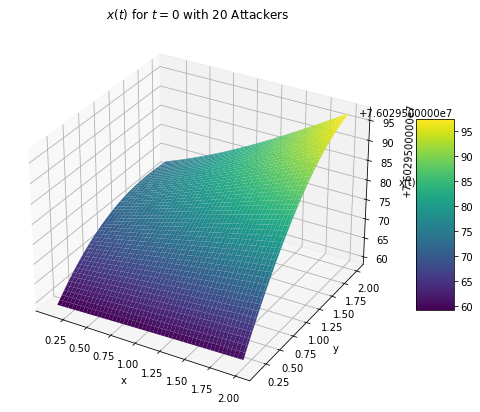

For t = 0, the maximum value of 'x(t)' is 76029597.45 at x = 2.00 and y = 2.00
The minimum value of 'x(t)' is 76029558.82 at x = 0.10 and y = 0.10



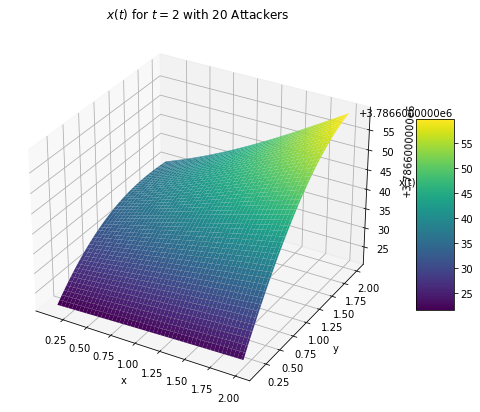

For t = 2, the maximum value of 'x(t)' is 3786659.83 at x = 2.00 and y = 2.00
The minimum value of 'x(t)' is 3786621.20 at x = 0.10 and y = 0.10



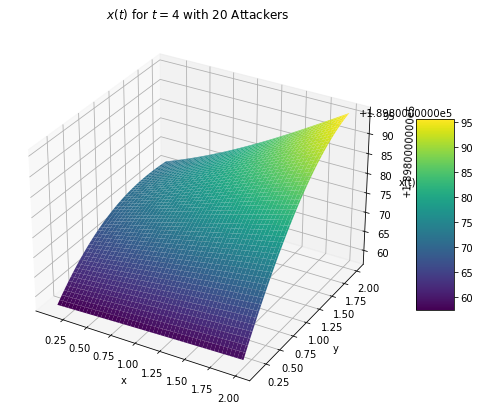

For t = 4, the maximum value of 'x(t)' is 189895.76 at x = 2.00 and y = 2.00
The minimum value of 'x(t)' is 189857.13 at x = 0.10 and y = 0.10



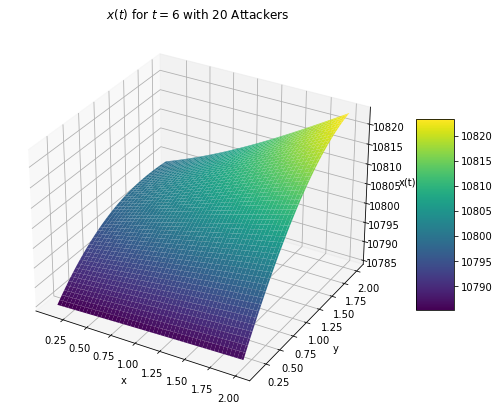

For t = 6, the maximum value of 'x(t)' is 10823.42 at x = 2.00 and y = 2.00
The minimum value of 'x(t)' is 10784.79 at x = 0.10 and y = 0.10



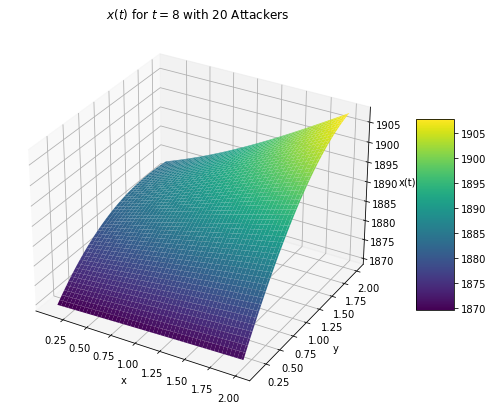

For t = 8, the maximum value of 'x(t)' is 1907.90 at x = 2.00 and y = 2.00
The minimum value of 'x(t)' is 1869.27 at x = 0.10 and y = 0.10



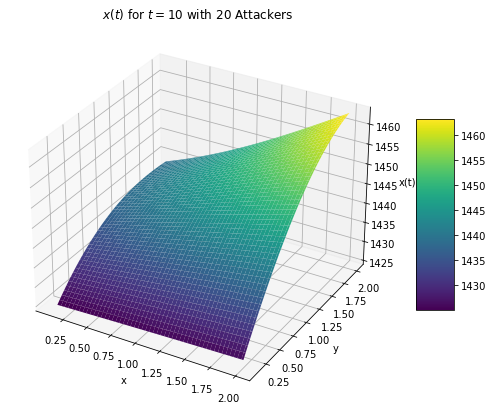

For t = 10, the maximum value of 'x(t)' is 1463.39 at x = 2.00 and y = 2.00
The minimum value of 'x(t)' is 1424.76 at x = 0.10 and y = 0.10



In [12]:
# Function to calculate risk level x(t) for a system with multiple attackers using new mu_star definitions
def calculate_risk_level_multiple_attackers_new(num_attackers):
    x_values_multiple_attackers = []
    for x in x_values:
        for y in y_values:
            x_t = []
            for t in t_points:
                total_mu_i_star = sum(calculate_mu_i_star(x, y, t) for _ in range(num_attackers))
                mu_0_star = calculate_mu_0_star(x, y, t)
                x_t.append((1 / epsilon) * (np.exp(epsilon * (T - t)) - alpha * mu_0_star - beta_i * total_mu_i_star))
            x_values_multiple_attackers.append(x_t)
    return x_values_multiple_attackers

# Calculate risk levels using new mu_star definitions for 20 attackers
x_values_twenty_attackers_new = calculate_risk_level_multiple_attackers_new(20)

# Reshape the data for plotting
x_values_twenty_attackers_new_reshaped = np.array(x_values_twenty_attackers_new).reshape(len(x_values), len(y_values), len(t_points))

# Plot x(t) for each time point in separate plots
for t in t_points:
    # Create new figure
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('x(t)')
    ax.set_title(fr'$x(t)$ for $t={t}$ with 20 Attackers')

    # Get x(t) values for 20 attackers at the current time point
    x_t_values_twenty_attackers = x_values_twenty_attackers_new_reshaped[:, :, t_points.index(t)]

    # Plot surface
    X, Y = np.meshgrid(x_values, y_values)
    surf = ax.plot_surface(X, Y, x_t_values_twenty_attackers, cmap='viridis')
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
# Calculate and print max and min values and their corresponding coordinates
    max_value = np.max(x_t_values_twenty_attackers)
    max_indices = np.unravel_index(np.argmax(x_t_values_twenty_attackers), x_t_values_twenty_attackers.shape)
    max_x = x_values[max_indices[0]]
    max_y = y_values[max_indices[1]]
    
    min_value = np.min(x_t_values_twenty_attackers)
    min_indices = np.unravel_index(np.argmin(x_t_values_twenty_attackers), x_t_values_twenty_attackers.shape)
    min_x = x_values[min_indices[0]]
    min_y = y_values[min_indices[1]]
    
    # Print the maximum value and corresponding x, y coordinates below the plot
    print(f"For t = {t}, the maximum value of 'x(t)' is {max_value:.2f} at x = {max_x:.2f} and y = {max_y:.2f}")
    # Print the minimum value and corresponding x, y coordinates below the plot
    print(f"The minimum value of 'x(t)' is {min_value:.2f} at x = {min_x:.2f} and y = {min_y:.2f}\n")


Numerical Simulations of Feedback Nash Equilibrium Solutions

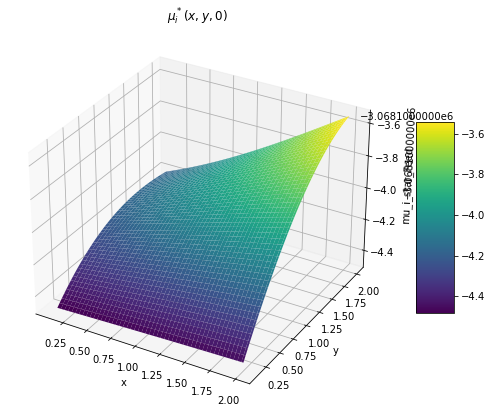

For t = 0, the maximum value of mu_i_star_Feed_values is -3068103.54 at x = 2.00 and y = 2.00

For t = 0, the minimum value of mu_i_star_Feed_values is -3068104.49 at x = 0.10 and y = 0.10



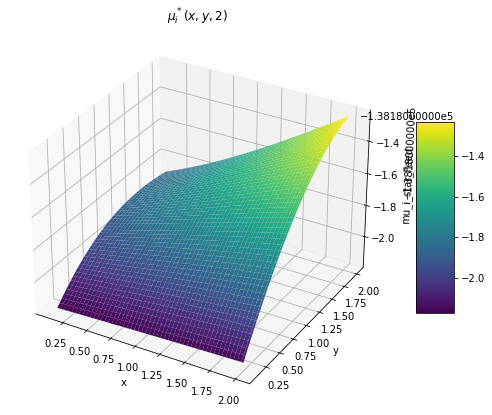

For t = 2, the maximum value of mu_i_star_Feed_values is -138181.23 at x = 2.00 and y = 2.00

For t = 2, the minimum value of mu_i_star_Feed_values is -138182.18 at x = 0.10 and y = 0.10



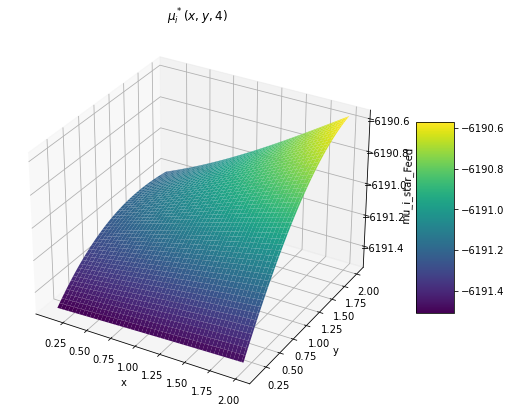

For t = 4, the maximum value of mu_i_star_Feed_values is -6190.57 at x = 2.00 and y = 2.00

For t = 4, the minimum value of mu_i_star_Feed_values is -6191.52 at x = 0.10 and y = 0.10



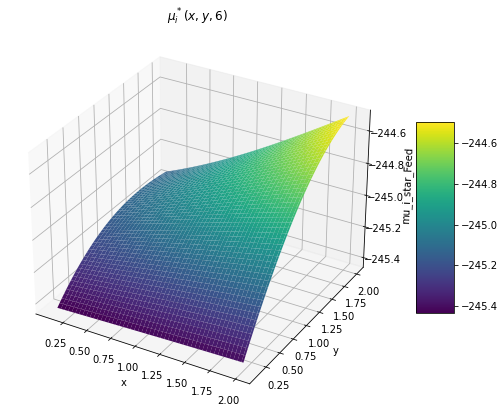

For t = 6, the maximum value of mu_i_star_Feed_values is -244.49 at x = 2.00 and y = 2.00

For t = 6, the minimum value of mu_i_star_Feed_values is -245.44 at x = 0.10 and y = 0.10



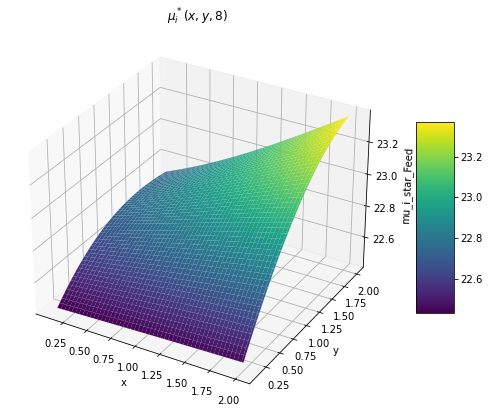

For t = 8, the maximum value of mu_i_star_Feed_values is 23.37 at x = 2.00 and y = 2.00

For t = 8, the minimum value of mu_i_star_Feed_values is 22.42 at x = 0.10 and y = 0.10



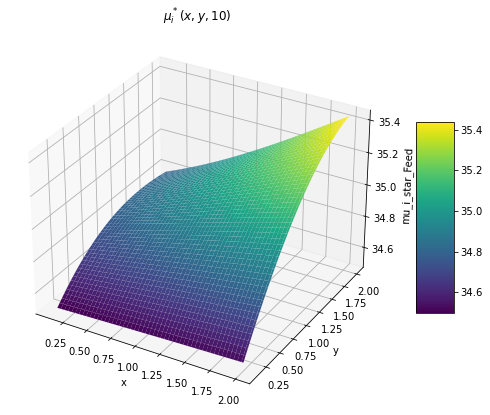

For t = 10, the maximum value of mu_i_star_Feed_values is 35.44 at x = 2.00 and y = 2.00

For t = 10, the minimum value of mu_i_star_Feed_values is 34.49 at x = 0.10 and y = 0.10



In [13]:
r = 0.05 # Define r
# Function to calculate mu_i_star_Feed
def calculate_mu_i_star_Feed(x, y, t):
    A_i = (np.exp((r - epsilon) * (T - t)) + rho_i) / (r - epsilon)
    mu_i_star_Feed = (upsilon_i * mu_0_t - beta_i * A_i) / (2 * mu_i) + Q(x, y) * s(x) 
    return mu_i_star_Feed

# Generate x, y values
x_values = np.linspace(0.1, 2, 100)
y_values = np.linspace(0.1, 2, 100)

# Define specific time points
t_points = [0, 2, 4, 6, 8, 10]

# Plot mu_i_star for each time point in separate plots
for t in t_points:
    # Create new figure
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('mu_i_star_Feed')
    ax.set_title(fr'$\mu_i^*(x, y, {t})$')

    # Calculate mu_i_star_Feed for all combinations of x, y at the current time point
    mu_i_star_Feed_values = np.zeros((len(x_values), len(y_values)))
    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):
            mu_i_star_Feed_values[i, j] = calculate_mu_i_star_Feed(x, y, t)

    # Plot surface
    X, Y = np.meshgrid(x_values, y_values)
    surf = ax.plot_surface(X, Y, mu_i_star_Feed_values, cmap='viridis')
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
# Find the maximum value and corresponding indices
    max_value = np.max(mu_i_star_Feed_values)
    max_indices = np.unravel_index(np.argmax(mu_i_star_Feed_values, axis=None), mu_i_star_Feed_values.shape)
    max_x = x_values[max_indices[0]]
    max_y = y_values[max_indices[1]]
    
    
# Find the minimum value and corresponding indices
    min_value = np.min(mu_i_star_Feed_values)
    min_indices = np.unravel_index(np.argmin(mu_i_star_Feed_values, axis=None), mu_i_star_Feed_values.shape)
    min_x = x_values[min_indices[0]]
    min_y = y_values[min_indices[1]]
    # Print the maximum value and corresponding x, y coordinates below the plot
    print(f'For t = {t}, the maximum value of mu_i_star_Feed_values is {max_value:.2f} at x = {max_x:.2f} and y = {max_y:.2f}\n')
    # Print the minimum value and corresponding x, y coordinates below the plot
    print(f'For t = {t}, the minimum value of mu_i_star_Feed_values is {min_value:.2f} at x = {min_x:.2f} and y = {min_y:.2f}\n')

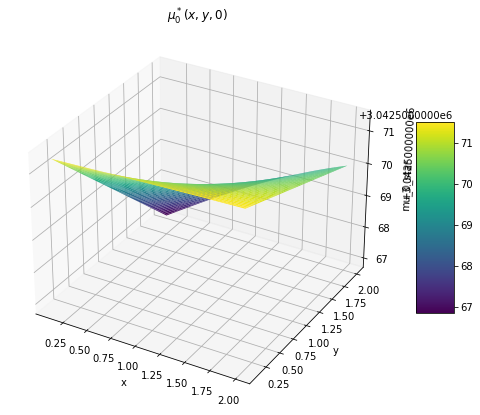

For t = 0, the maximum value of mu_0_star_Feed_values is 3042571.53 at x = 0.10 and y = 2.00

For t = 0, the minimum value of mu_0_star_Feed_values is 3042566.79 at x = 2.00 and y = 0.10



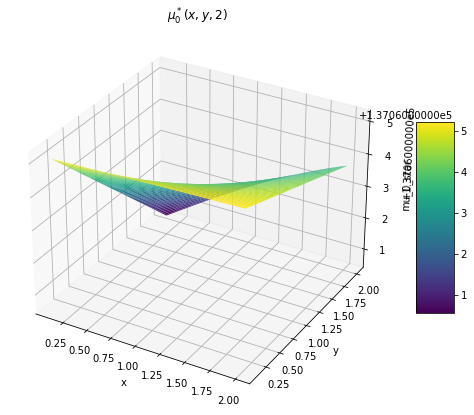

For t = 2, the maximum value of mu_0_star_Feed_values is 137065.24 at x = 0.10 and y = 2.00

For t = 2, the minimum value of mu_0_star_Feed_values is 137060.50 at x = 2.00 and y = 0.10



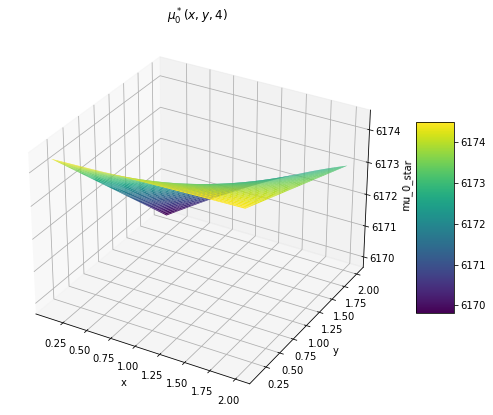

For t = 4, the maximum value of mu_0_star_Feed_values is 6174.50 at x = 0.10 and y = 2.00

For t = 4, the minimum value of mu_0_star_Feed_values is 6169.76 at x = 2.00 and y = 0.10



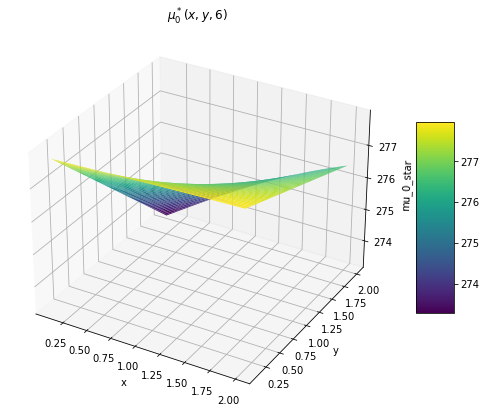

For t = 6, the maximum value of mu_0_star_Feed_values is 277.97 at x = 0.10 and y = 2.00

For t = 6, the minimum value of mu_0_star_Feed_values is 273.24 at x = 2.00 and y = 0.10



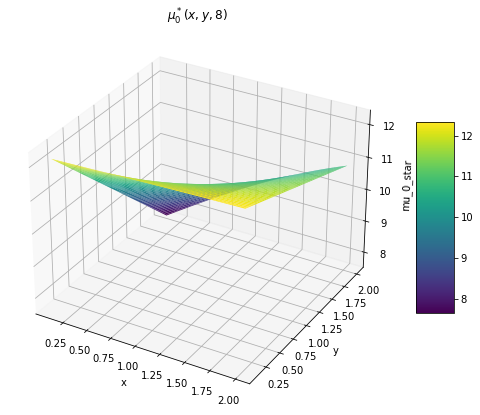

For t = 8, the maximum value of mu_0_star_Feed_values is 12.34 at x = 0.10 and y = 2.00

For t = 8, the minimum value of mu_0_star_Feed_values is 7.60 at x = 2.00 and y = 0.10



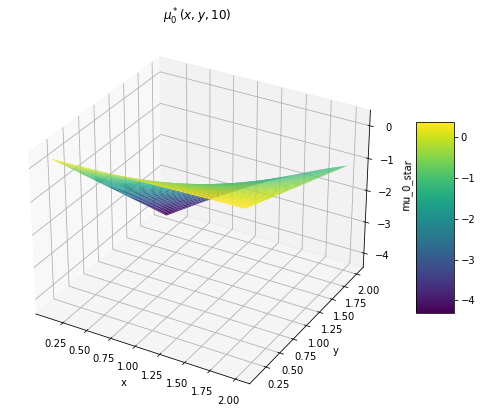

For t = 10, the maximum value of mu_0_star_Feed_values is 0.37 at x = 0.10 and y = 2.00

For t = 10, the minimum value of mu_0_star_Feed_values is -4.36 at x = 2.00 and y = 0.10



In [14]:
# Function to calculate mu_0_star_Feed
def calculate_mu_0_star_Feed(x, y, t):
    A_0 = (np.exp((r - epsilon) * (T - t)) - rho_0) / (r - epsilon)
    mu_0_star_Feed = -alpha * A_0 / (2 * upsilon_0) - P(y) * x
    return mu_0_star_Feed

# Generate x, y values
x_values = np.linspace(0.1, 2, 100)
y_values = np.linspace(0.1, 2, 100)

# Define specific time points
t_points = [0, 2, 4, 6, 8, 10]

# Plot mu_0_star for each time point in separate plots
for t in t_points:
    # Create new figure
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('mu_0_star')
    ax.set_title(fr'$\mu_0^*(x, y, {t})$')

    # Calculate mu_0_star for all combinations of x, y at the current time point
    mu_0_star_Feed_values = np.zeros((len(x_values), len(y_values)))
    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):
            mu_0_star_Feed_values[i, j] = calculate_mu_0_star_Feed(x, y, t)

    # Plot surface
    X, Y = np.meshgrid(x_values, y_values)
    surf = ax.plot_surface(X, Y, mu_0_star_Feed_values, cmap='viridis')
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
# Find the maximum value and corresponding indices
    max_value = np.max(mu_0_star_Feed_values)
    max_indices = np.unravel_index(np.argmax(mu_0_star_Feed_values, axis=None), mu_0_star_Feed_values.shape)
    max_x = x_values[max_indices[0]]
    max_y = y_values[max_indices[1]]
    
    
# Find the minimum value and corresponding indices
    min_value = np.min(mu_0_star_Feed_values)
    min_indices = np.unravel_index(np.argmin(mu_0_star_Feed_values, axis=None), mu_0_star_Feed_values.shape)
    min_x = x_values[min_indices[0]]
    min_y = y_values[min_indices[1]]
    # Print the maximum value and corresponding x, y coordinates below the plot
    print(f'For t = {t}, the maximum value of mu_0_star_Feed_values is {max_value:.2f} at x = {max_x:.2f} and y = {max_y:.2f}\n')
    # Print the minimum value and corresponding x, y coordinates below the plot
    print(f'For t = {t}, the minimum value of mu_0_star_Feed_values is {min_value:.2f} at x = {min_x:.2f} and y = {min_y:.2f}\n')   
    

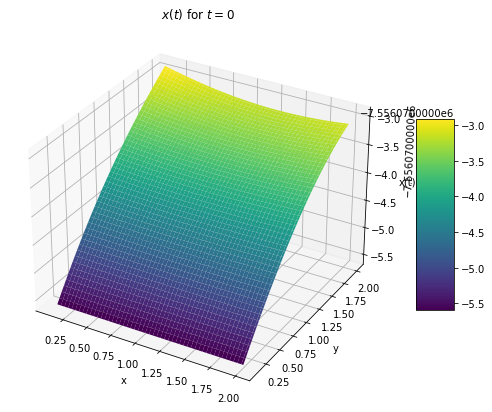

For t = 0, the maximum value of 'x(t)' is -7556072.90 at x = 2.00 and y = 0.10
The minimum value of 'x(t)' is -7556075.63 at x = 0.10 and y = 2.00



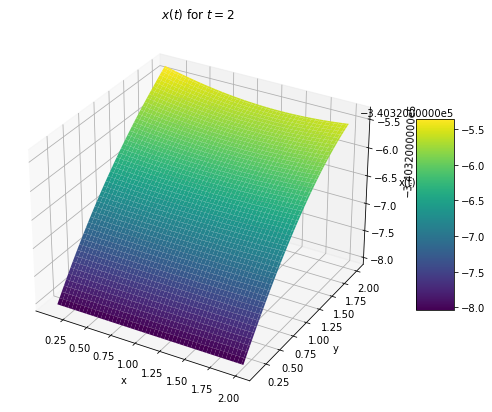

For t = 2, the maximum value of 'x(t)' is -340325.34 at x = 2.00 and y = 0.10
The minimum value of 'x(t)' is -340328.07 at x = 0.10 and y = 2.00



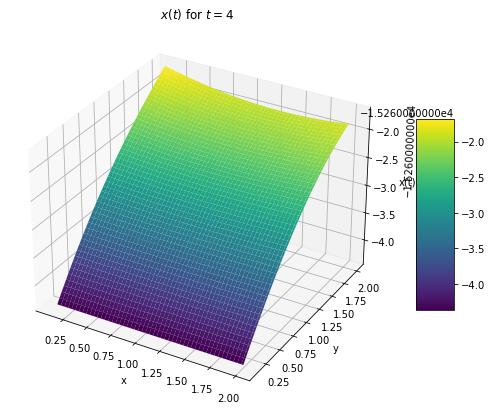

For t = 4, the maximum value of 'x(t)' is -15261.67 at x = 2.00 and y = 0.10
The minimum value of 'x(t)' is -15264.40 at x = 0.10 and y = 2.00



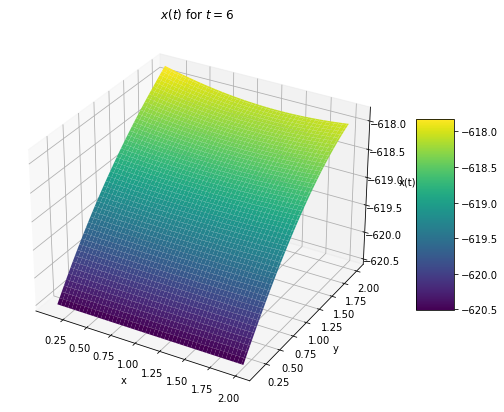

For t = 6, the maximum value of 'x(t)' is -617.81 at x = 2.00 and y = 0.10
The minimum value of 'x(t)' is -620.54 at x = 0.10 and y = 2.00



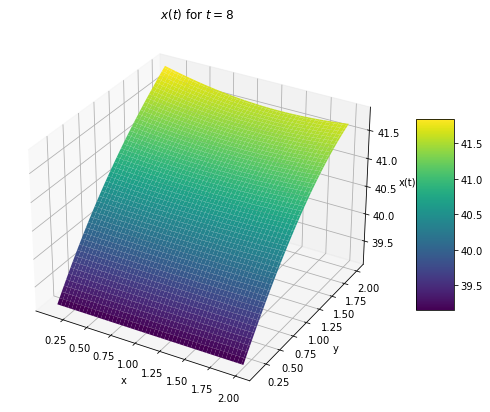

For t = 8, the maximum value of 'x(t)' is 41.85 at x = 2.00 and y = 0.10
The minimum value of 'x(t)' is 39.12 at x = 0.10 and y = 2.00



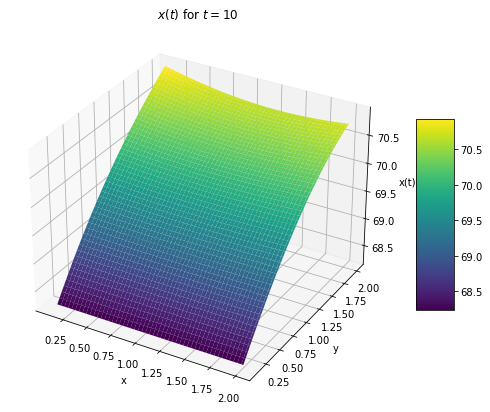

For t = 10, the maximum value of 'x(t)' is 70.93 at x = 2.00 and y = 0.10
The minimum value of 'x(t)' is 68.21 at x = 0.10 and y = 2.00



In [17]:
# Function to calculate risk level x(t) for a system with one attacker using new mu_star definitions
def calculate_risk_level_one_attacker_new_Feed():
    x_values_one_attacker_Feed = []
    for x in x_values:
        for y in y_values:
            x_t = []
            for t in t_points:
                mu_0_star_Feed = calculate_mu_0_star_Feed(x, y, t)
                mu_i_star_Feed = calculate_mu_i_star_Feed(x, y, t)
                x_t.append((1 / epsilon) * (np.exp(epsilon * (T - t)) - alpha * mu_0_star_Feed - beta_i * mu_i_star_Feed))
            x_values_one_attacker_Feed.append(x_t)
    return x_values_one_attacker_Feed
x_values_one_attacker_new_Feed = calculate_risk_level_one_attacker_new_Feed()

# Reshape the data for plotting
X, Y = np.meshgrid(x_values, y_values)
x_values_one_attacker_new_reshaped_Feed = np.array(x_values_one_attacker_new_Feed).reshape(len(x_values), len(y_values), len(t_points))


# Plot x(t) for each time point in separate plots
for t in t_points:
    # Create new figure
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('x(t)')
    ax.set_title(fr'$x(t)$ for $t={t}$')

    # Calculate x(t) for all combinations of x, y at the current time point
    x_t_values_Feed = np.zeros((len(x_values), len(y_values)))
    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):
            mu_0_star_Feed = calculate_mu_0_star_Feed(x, y, t)
            mu_i_star_Feed = calculate_mu_i_star_Feed(x, y, t)
            x_t_values_Feed[i, j] = (1 / epsilon) * (np.exp(epsilon * (T - t)) - alpha * mu_0_star_Feed - beta_i * mu_i_star_Feed)

    # Plot surface
    X, Y = np.meshgrid(x_values, y_values)
    surf = ax.plot_surface(X, Y, x_t_values_Feed, cmap='viridis')
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
 # Calculate and print max and min values and their corresponding coordinates
    max_value = np.max(x_t_values_Feed)
    max_indices = np.unravel_index(np.argmax(x_t_values_Feed), x_t_values_Feed.shape)
    max_x = x_values[max_indices[0]]
    max_y = y_values[max_indices[1]]
    
    min_value = np.min(x_t_values_Feed)
    min_indices = np.unravel_index(np.argmin(x_t_values_Feed), x_t_values_Feed.shape)
    min_x = x_values[min_indices[0]]
    min_y = y_values[min_indices[1]]
    
    # Print the maximum value and corresponding x, y coordinates below the plot
    print(f"For t = {t}, the maximum value of 'x(t)' is {max_value:.2f} at x = {max_x:.2f} and y = {max_y:.2f}")
    # Print the minimum value and corresponding x, y coordinates below the plot
    print(f"The minimum value of 'x(t)' is {min_value:.2f} at x = {min_x:.2f} and y = {min_y:.2f}\n")


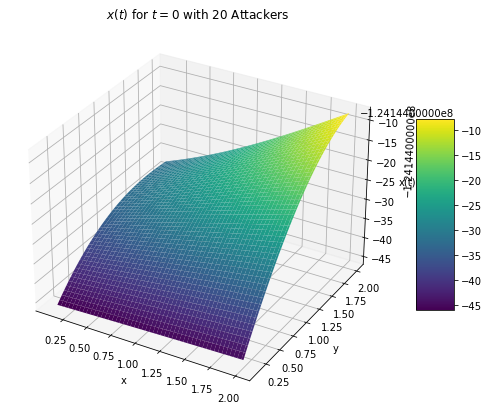

For t = 0, the maximum value of 'x(t)' is -124144007.63 at x = 2.00 and y = 2.00
The minimum value of 'x(t)' is -124144046.26 at x = 0.10 and y = 0.10



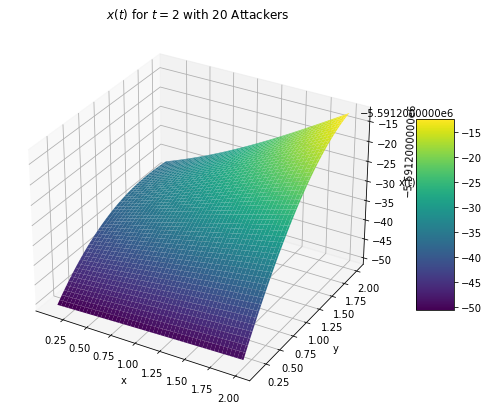

For t = 2, the maximum value of 'x(t)' is -5591212.27 at x = 2.00 and y = 2.00
The minimum value of 'x(t)' is -5591250.90 at x = 0.10 and y = 0.10



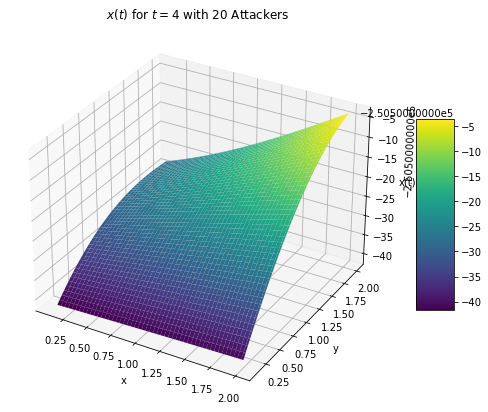

For t = 4, the maximum value of 'x(t)' is -250503.40 at x = 2.00 and y = 2.00
The minimum value of 'x(t)' is -250542.03 at x = 0.10 and y = 0.10



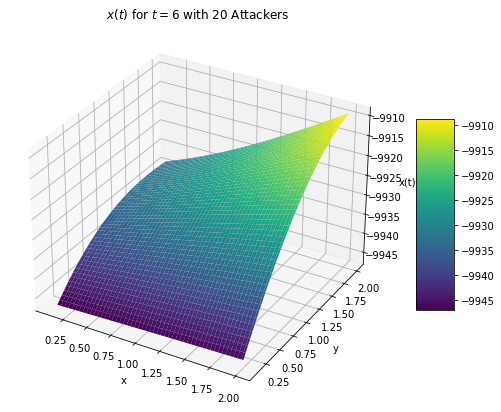

For t = 6, the maximum value of 'x(t)' is -9908.73 at x = 2.00 and y = 2.00
The minimum value of 'x(t)' is -9947.36 at x = 0.10 and y = 0.10



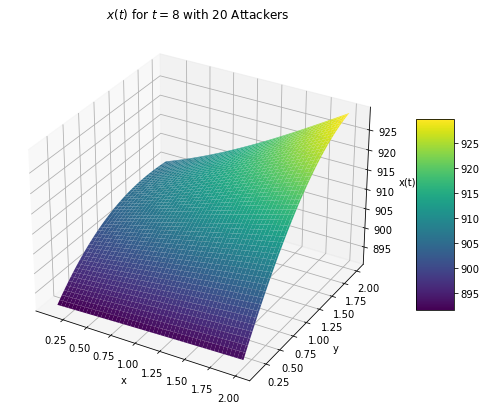

For t = 8, the maximum value of 'x(t)' is 929.84 at x = 2.00 and y = 2.00
The minimum value of 'x(t)' is 891.21 at x = 0.10 and y = 0.10



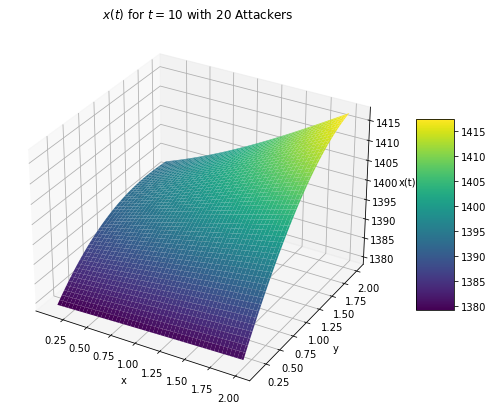

For t = 10, the maximum value of 'x(t)' is 1417.47 at x = 2.00 and y = 2.00
The minimum value of 'x(t)' is 1378.84 at x = 0.10 and y = 0.10



In [16]:
# Function to calculate risk level x(t) for a system with multiple attackers using new mu_star definitions_Feed
def calculate_risk_level_multiple_attackers_new_Feed(num_attackers):
    x_values_multiple_attackers_Feed = []
    for x in x_values:
        for y in y_values:
            x_t = []
            for t in t_points:
                total_mu_i_star_Feed = sum(calculate_mu_i_star_Feed(x, y, t) for _ in range(num_attackers))
                mu_0_star_Feed = calculate_mu_0_star_Feed(x, y, t)
                x_t.append((1 / epsilon) * (np.exp(epsilon * (T - t)) - alpha * mu_0_star_Feed - beta_i * total_mu_i_star_Feed))
            x_values_multiple_attackers_Feed.append(x_t)
    return x_values_multiple_attackers_Feed

# Calculate risk levels using new mu_star definitions for 20 attackers
x_values_twenty_attackers_new_Feed = calculate_risk_level_multiple_attackers_new_Feed(20)

# Reshape the data for plotting
x_values_twenty_attackers_new_reshaped_Feed = np.array(x_values_twenty_attackers_new_Feed).reshape(len(x_values), len(y_values), len(t_points))

# Plot x(t) for each time point in separate plots
for t in t_points:
    # Create new figure
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('x(t)')
    ax.set_title(fr'$x(t)$ for $t={t}$ with 20 Attackers')

    # Get x(t) values for 20 attackers at the current time point
    x_t_values_twenty_attackers_Feed = x_values_twenty_attackers_new_reshaped_Feed[:, :, t_points.index(t)]

    # Plot surface
    X, Y = np.meshgrid(x_values, y_values)
    surf = ax.plot_surface(X, Y, x_t_values_twenty_attackers_Feed, cmap='viridis')
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
# Calculate and print max and min values and their corresponding coordinates
    max_value = np.max(x_t_values_twenty_attackers_Feed)
    max_indices = np.unravel_index(np.argmax(x_t_values_twenty_attackers_Feed), x_t_values_twenty_attackers_Feed.shape)
    max_x = x_values[max_indices[0]]
    max_y = y_values[max_indices[1]]
    
    min_value = np.min(x_t_values_twenty_attackers_Feed)
    min_indices = np.unravel_index(np.argmin(x_t_values_twenty_attackers_Feed), x_t_values_twenty_attackers_Feed.shape)
    min_x = x_values[min_indices[0]]
    min_y = y_values[min_indices[1]]
    
    # Print the maximum value and corresponding x, y coordinates below the plot
    print(f"For t = {t}, the maximum value of 'x(t)' is {max_value:.2f} at x = {max_x:.2f} and y = {max_y:.2f}")
    # Print the minimum value and corresponding x, y coordinates below the plot
    print(f"The minimum value of 'x(t)' is {min_value:.2f} at x = {min_x:.2f} and y = {min_y:.2f}\n")
